In [201]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Define the directory where the files are saved
save_dir = 'Test\detection1'

# Load the saved frames and image stack
max_frame = np.load(os.path.join(save_dir, 'max_frame.npy'))
min_frame = np.load(os.path.join(save_dir, 'min_frame.npy')) 
median_frame = np.load(os.path.join(save_dir, 'median_frame.npy'))
image_stack = np.load(os.path.join(save_dir, 'image_stack.npy'))

33


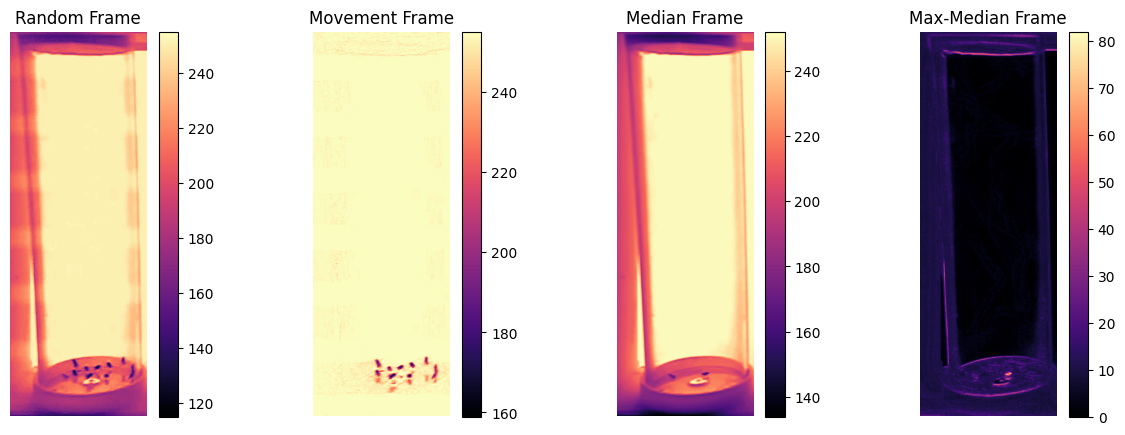

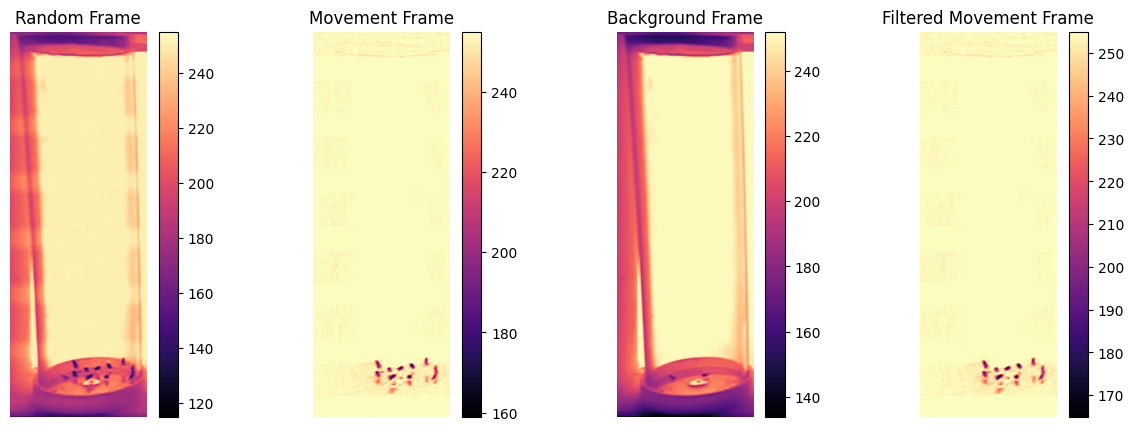

In [203]:
import imageio
import skimage
from skimage import color, filters, measure
import pandas as pd
import numpy as np
from PyQt5.QtCore import QThread, pyqtSignal
import os
import sys
import heapq
from skimage import morphology
from scipy.ndimage import median_filter
import copy
from skimage.filters import threshold_otsu

# Visibility mask approach not used
dif_frame = max_frame - min_frame
threshold_value = threshold_otsu(dif_frame)
visibility_mask = dif_frame < threshold_value 

c = np.random.randint(0, image_stack.shape[0])
random_frame = image_stack[c, :, :]
print(c)
movement_frame = random_frame - median_frame
movement_frame = 255 - abs(np.clip(movement_frame, None, 0))

# Create a 1x4 subplot layout
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

# Display the random frame
im1 = axes[0].imshow(random_frame, cmap='magma')
axes[0].axis('off')
axes[0].set_title("Random Frame")
plt.colorbar(im1, ax=axes[0])

# Display the movement frame
im2 = axes[1].imshow(movement_frame, cmap='magma')
axes[1].axis('off')
axes[1].set_title("Movement Frame")
plt.colorbar(im2, ax=axes[1])

# Display the median frame
im3 = axes[2].imshow(median_frame, cmap='magma')
axes[2].axis('off')
axes[2].set_title("Median Frame")
plt.colorbar(im3, ax=axes[2])

# Display the max frame minus median frame
im4 = axes[3].imshow(max_frame - median_frame, cmap='magma')
axes[3].axis('off')
axes[3].set_title("Max-Median Frame")
plt.colorbar(im4, ax=axes[3])

# Show the plot
plt.show()

# Calculate difference image and binary mask
diff_image = max_frame - median_frame
mask = diff_image > 70

background = copy.deepcopy(median_frame)
background[mask] = max_frame[mask]

# Calculate new movement frame
movement_frame = random_frame - background
movement_frame = 255 - abs(np.clip(movement_frame, None, 0))

# Create a 1x4 subplot layout
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

# Display the random frame
im1 = axes[0].imshow(random_frame, cmap='magma')
axes[0].axis('off')
axes[0].set_title("Random Frame")
plt.colorbar(im1, ax=axes[0])

# Display the movement frame
im2 = axes[1].imshow(movement_frame, cmap='magma')
axes[1].axis('off')
axes[1].set_title("Movement Frame")
plt.colorbar(im2, ax=axes[1])

# Display the median frame
im3 = axes[2].imshow(background, cmap='magma')
axes[2].axis('off')
axes[2].set_title("Background Frame")
plt.colorbar(im3, ax=axes[2])

# Display the max frame minus median frame
im4 = axes[3].imshow(median_filter(movement_frame, size=3), cmap='magma')
axes[3].axis('off')
axes[3].set_title("Filtered Movement Frame")
plt.colorbar(im4, ax=axes[3])

# Show the plot
plt.show()


1210


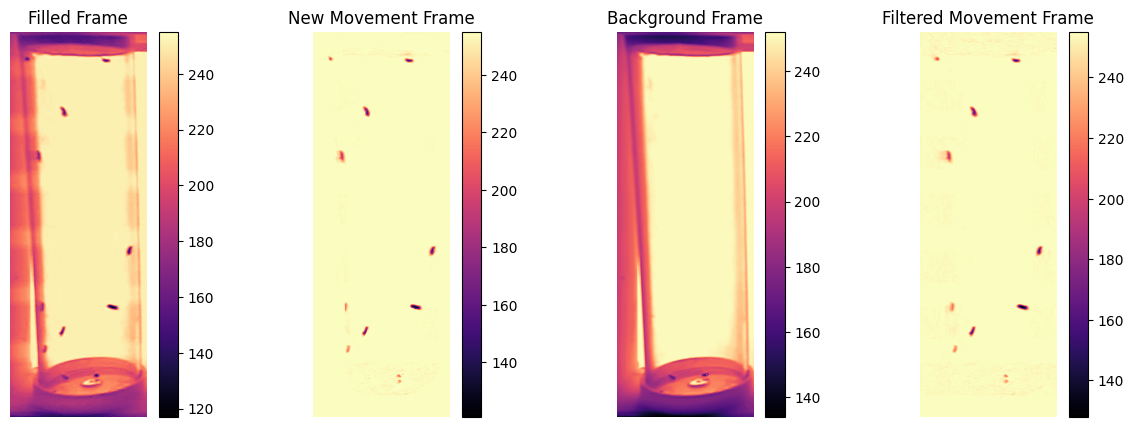

In [204]:
import matplotlib.pyplot as plt
import numpy as np
import copy
from skimage.filters import threshold_otsu
from scipy.ndimage import median_filter

dif_frame = max_frame - min_frame
threshold_value = threshold_otsu(dif_frame)
visibility_mask = dif_frame > threshold_value

# Randomly select a frame from the image stack
c = np.random.randint(0, image_stack.shape[0])
random_frame = image_stack[c, :, :]
print(c)

# Calculate new movement frame
c = np.random.randint(0, image_stack.shape[0])
movement_frame = random_frame - background
movement_frame = 255 - abs(np.clip(movement_frame, None, 0))
filled_movement_frame = np.where(visibility_mask, movement_frame, 255)
# Create a 1x4 subplot layout for the new movement frame
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

# Display the filled random frame
im1 = axes[0].imshow(random_frame, cmap='magma')
axes[0].axis('off')
axes[0].set_title("Filled Frame")
plt.colorbar(im1, ax=axes[0])

# Display the new movement frame
im2 = axes[1].imshow(filled_movement_frame, cmap='magma')
axes[1].axis('off')
axes[1].set_title("New Movement Frame")
plt.colorbar(im2, ax=axes[1])

# Display the background frame
im3 = axes[2].imshow(background, cmap='magma')
axes[2].axis('off')
axes[2].set_title("Background Frame")
plt.colorbar(im3, ax=axes[2])

# Display the filtered movement frame
im4 = axes[3].imshow(median_filter(movement_frame, size=(3, 3)), cmap='magma')
axes[3].axis('off')
axes[3].set_title("Filtered Movement Frame")
plt.colorbar(im4, ax=axes[3])

# Show the plot
plt.show()


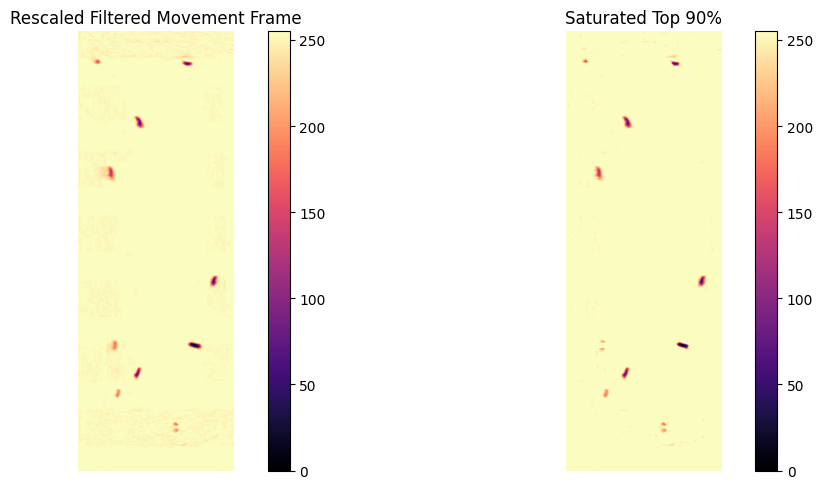

In [205]:
movement_frame = median_filter(movement_frame, size=(3, 3))
min_val = np.min(movement_frame)
max_val = np.max(movement_frame)
rescaled_frame = 255 * (movement_frame - min_val) / (max_val - min_val)
rescaled_frame = rescaled_frame.astype(np.uint8)  # Convert to uint8 for display

saturated_frame = np.zeros_like(rescaled_frame)

# Step 3: Iterate over 3-pixel high strips across the height of the image
height, width = rescaled_frame.shape

step = 5
for y in range(0, height, step):
    strip = rescaled_frame[y:y + step, :]
    if strip.size == 0: continue
    
    threshold = np.percentile(strip, 5)
    saturated_strip = np.where(strip >= threshold, 255, strip)
    
    saturated_frame[y:y+step, :] = saturated_strip

# Step 7: Plot the original rescaled and saturated images
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Display the original rescaled image
im4 = axes[0].imshow(rescaled_frame, cmap='magma', vmin=0, vmax=255)
axes[0].axis('off')
axes[0].set_title("Rescaled Filtered Movement Frame")
plt.colorbar(im4, ax=axes[0])

# Display the saturated image
im5 = axes[1].imshow(saturated_frame, cmap='magma', vmin=0, vmax=255)
axes[1].axis('off')
axes[1].set_title("Saturated Top 90%")
plt.colorbar(im5, ax=axes[1])

plt.tight_layout()
plt.show()


233.3490566037736
0


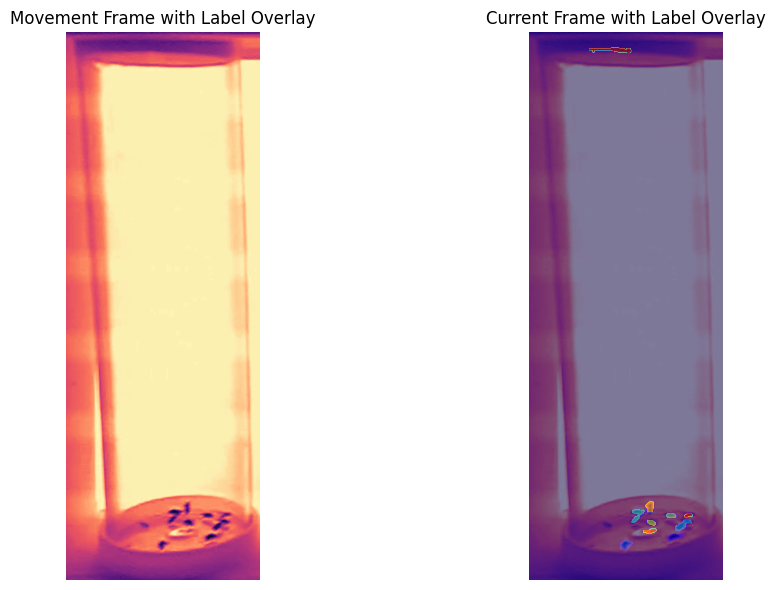

C:\Users\marko\AppData\Local\Temp\ipykernel_13552\1172828858.py:115: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  blob_data = pd.concat([blob_data, frame_data], ignore_index=True)


240.70093457943926
1
241.21621621621622
2
241.3392857142857
3
238.47222222222223
4
235.93457943925233
5
233.75
6
236.44744897959217
7
235.0
8
235.8064516129032
9
236.5979381443299
10
236.21052631578948
11
236.01063829787233
12
238.1868131868132
13
230.05434782608697
14
230.05434782608697
15
219.0
16
236.7857142857143
17
238.1868131868132
18
232.96296296296296
19
237.80898876404493
20
246.5934065934066
21
249.0
22
248.625
23
246.0
24
245.89285714285714
25
245.78313253012047
26
248.92857142857142
27
246.3068181818182
28
249.13793103448276
29
249.45652173913044
30
246.5
31
249.2696629213483
32
249.33333333333331
33
249.20454545454547
34
249.45652173913044
35
249.45652173913044
36
249.45652173913044
37
249.06976744186045
38
249.45652173913044
39
249.45652173913044
40
249.39560439560438
41
249.51612903225808
42
249.63157894736844
43
249.39560439560438
44
249.6875
45
246.94736842105263
46
249.63157894736844
47
246.94736842105263
48
246.94736842105263
49
246.94736842105263
50
246.684782608695

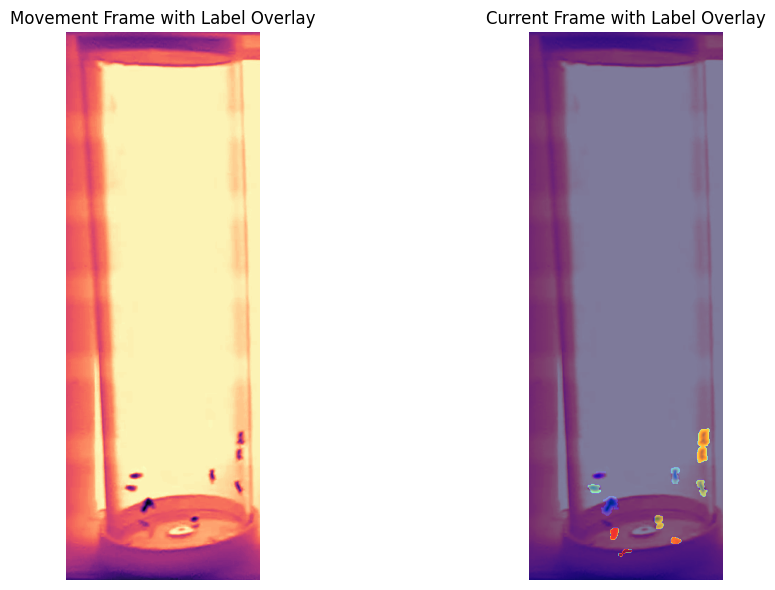

245.0970873786408
351
247.91666666666666
352
247.85046728971963
353
245.37735849056605
354
247.85046728971963
355
248.23008849557522
356
245.37735849056605
357
248.34782608695653
358
245.89285714285714
359
248.625
360
246.42857142857144
361
245.6422018348624
362
248.625
363
246.5702479338843
364
248.6776859504132
365
248.6776859504132
366
248.57142857142856
367
245.72727272727272
368
248.625
369
248.625
370
245.8108108108108
371
248.6776859504132
372
248.10810810810813
373
245.72727272727272
374
248.4051724137931
375
247.91666666666666
376
248.04545454545456
377
248.10810810810813
378
245.0970873786408
379
247.9816513761468
380
248.23008849557522
381
245.72727272727272
382
247.9816513761468
383
246.05263157894737
384
248.04545454545456
385
245.2857142857143
386
245.46728971962617
387
245.97345132743362
388
248.34782608695653
389
245.97345132743362
390
246.20689655172416
391
248.28947368421052
392
245.6422018348624
393
246.42857142857144
394
248.16964285714286
395
244.10256410256412
396

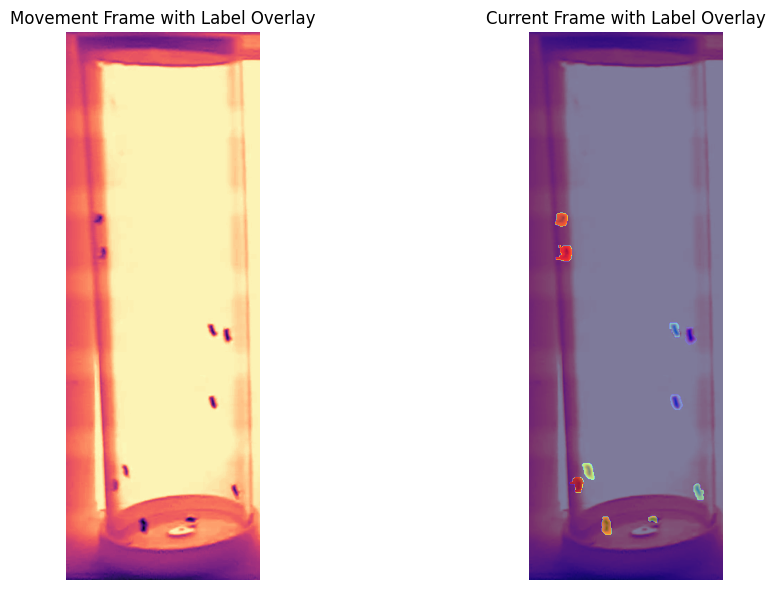

243.4090909090909
701
245.55555555555554
702
245.89285714285714
703
246.1304347826087
704
245.72727272727272
705
245.89285714285714
706
245.55555555555554
707
244.00862068965517
708
245.89285714285714
709
245.55555555555554
710
246.1304347826087
711
243.8157894736842
712
243.71681415929206
713
243.71681415929206
714
243.8157894736842
715
243.71681415929206
716
246.05263157894737
717
243.8157894736842
718
243.71681415929206
719
245.97345132743362
720
244.6542857142863
721
243.61607142857144
722
243.61607142857144
723
245.55555555555554
724
243.4090909090909
725
245.6422018348624
726
243.19444444444446
727
242.58055555555612
728
243.19444444444446
729
243.91304347826087
730
243.71681415929206
731
242.97169811320754
732
245.6422018348624
733
243.30275229357798
734
245.72727272727272
735
243.30275229357798
736
245.72727272727272
737
245.55555555555554
738
245.2857142857143
739
245.89285714285714
740
245.46728971962617
741
244.27570093457945
742
245.55555555555554
743
245.46728971962617
744

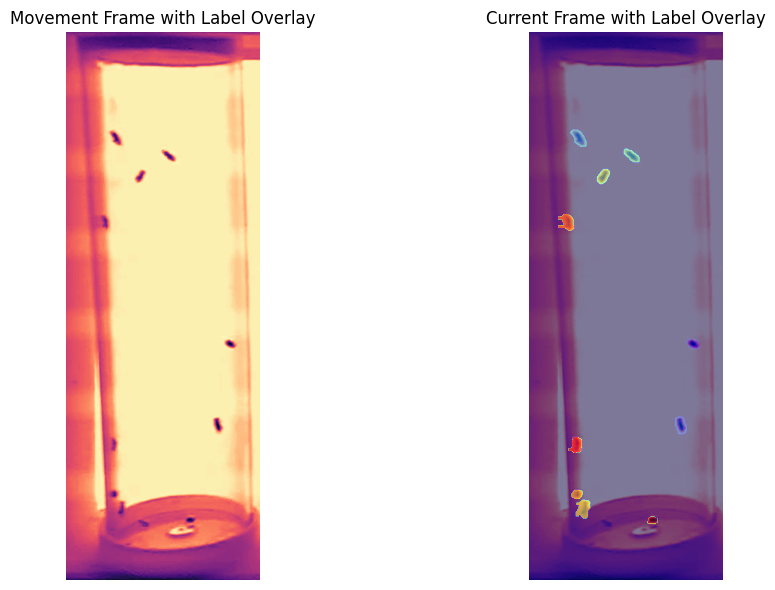

241.69565217391303
1051
239.8728813559322
1052
239.20353982300887
1053
242.35537190082647
1054
243.8157894736842
1055
242.25
1056
242.25
1057
246.9047619047619
1058
242.66129032258067
1059
244.2857142857143
1060
244.71774193548387
1061
242.85714285714283
1062
244.375
1063
245.0390625
1064
244.375
1065
244.54918032786884
1066
246.7741935483871
1067
242.5609756097561
1068
244.375
1069
246.7741935483871
1070
244.46280991735537
1071
246.70731707317074
1072
244.71774193548387
1073
243.91304347826087
1074
246.9047619047619
1075
244.96062992125982
1076
246.7741935483871
1077
245.11627906976744
1078
247.03125
1079
245.0390625
1080
244.2857142857143
1081
247.03125
1082
244.54918032786884
1083
246.96850393700785
1084
244.88095238095238
1085
244.46280991735537
1086
244.96062992125982
1087
246.7741935483871
1088
242.9527559055118
1089
246.70731707317074
1090
245.89285714285714
1091
244.46280991735537
1092
246.9047619047619
1093
244.96062992125982
1094
246.5
1095
249.06976744186045
1096
245.1162790

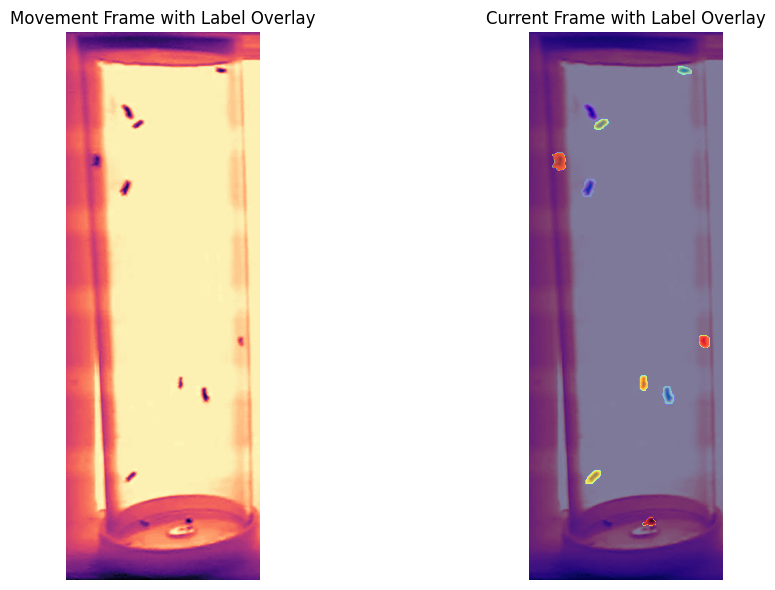

243.71681415929206
1401
243.71681415929206
1402
245.72727272727272
1403
245.72727272727272
1404
245.72727272727272
1405
245.89285714285714
1406
245.89285714285714
1407
245.89285714285714
1408
245.46728971962617
1409
246.05263157894737
1410
245.97345132743362
1411
245.6422018348624
1412
247.9816513761468
1413
245.72727272727272
1414
245.97345132743362
1415
245.6422018348624
1416
246.20689655172416
1417
246.05263157894737
1418
245.55555555555554
1419
245.97345132743362
1420
245.89285714285714
1421
243.30275229357798
1422
245.97345132743362
1423
245.97345132743362
1424
243.91304347826087
1425
243.71681415929206
1426
243.30275229357798
1427
246.05263157894737
1428
245.89285714285714
1429
245.72727272727272
1430
245.97345132743362
1431
245.97345132743362
1432
245.72727272727272
1433
243.71681415929206
1434
245.97345132743362
1435
245.6422018348624
1436
246.05263157894737
1437
245.89285714285714
1438
245.89285714285714
1439
243.61607142857144
1440
245.6422018348624
1441
245.6422018348624
144

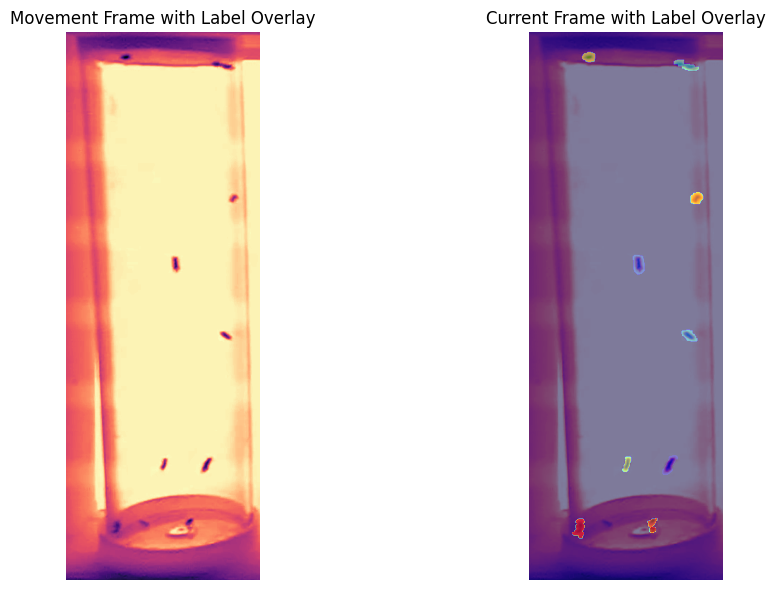

248.04545454545456
1751
248.34782608695653
1752
248.4051724137931
1753
248.28947368421052
1754
246.63934426229508
1755
250.75
1756
246.20689655172416
1757
246.20689655172416
1758
250.64102564102564
1759
247.9816513761468
1760
248.34782608695653
1761
250.52631578947367
1762
248.28947368421052
1763
248.46153846153845
1764
248.625
1765
248.40371900826472
1766
248.625
1767
248.04545454545456
1768
246.20689655172416
1769
248.4051724137931
1770
246.2820512820513
1771
248.46153846153845
1772
248.16964285714286
1773
248.625
1774
246.2820512820513
1775
248.46153846153845
1776
247.91666666666666
1777
246.5
1778
246.5
1779
248.625
1780
246.05263157894737
1781
248.625
1782
247.9816513761468
1783
246.2820512820513
1784
248.4051724137931
1785
248.16964285714286
1786
248.625
1787
248.46153846153845
1788
246.42857142857144
1789
248.57142857142856
1790
248.28947368421052
1791
246.5
1792
248.57142857142856
1793
246.2820512820513
1794
248.57142857142856
1795
248.23008849557522
1796
246.5
1797
248.6776859

In [207]:
def region_growing_bfs(image, seed_point, threshold):

    height, width = image.shape
    visited = np.zeros_like(image, dtype=bool)
    segmented_image = np.zeros_like(image)
    queue = [(image[seed_point], seed_point)]
    heapq.heapify(queue)
    segmented_image[seed_point] = 255
    visited[seed_point] = True

    while queue:
        _, current_point = heapq.heappop(queue)
        y, x = current_point

        # Explore neighbors in all 8 directions
        neighbors = [(y + dy, x + dx) for dy in [-1, 0, 1] for dx in [-1, 0, 1] if (dy != 0 or dx != 0)]

        # Create a priority queue for neighbors based on pixel value
        neighbor_queue = [(image[ny, nx], (ny, nx)) for ny, nx in neighbors if
                            0 <= ny < height and 0 <= nx < width and not visited[ny, nx] and
                                        (image[ny, nx] > image[y, x] or image[ny, nx] <= threshold)]
        heapq.heapify(neighbor_queue)

        while neighbor_queue:
            _, neighbor_point = heapq.heappop(neighbor_queue)
            ny, nx = neighbor_point
            if not visited[ny, nx]:
                segmented_image[ny, nx] = 255
                visited[ny, nx] = True
                heapq.heappush(queue, (image[ny, nx], (ny, nx)))  # Add to main queue for next depth level

    return segmented_image

blob_data = pd.DataFrame(columns=['x', 'y', 'area', 'eccentricity', 'frame'])

for c, current_frame in enumerate(image_stack):
    movement_frame = current_frame - background
    movement_frame = 255 - np.abs(np.clip(movement_frame, None, 0))
    #movement_frame = np.where(visibility_mask, movement_frame, 255)
    movement_frame = median_filter(movement_frame, size=3)
    
    min_val = np.min(movement_frame)
    max_val = np.max(movement_frame)
    movement_frame = (movement_frame - min_val) / (max_val - min_val) * 255

    height, width = movement_frame.shape

    step = 5
    for y in range(0, height, step):
        strip = movement_frame[y:y + step, :]
        if strip.size == 0: continue    
        threshold = np.percentile(strip, 5)
        saturated_strip = np.where(strip >= threshold, 255, strip)
    
        movement_frame[y:y+step, :] = saturated_strip

    threshold = np.percentile(movement_frame, 1)
    print(threshold)
    movement_frame = np.where(movement_frame > threshold, 255, movement_frame)

    # Initialize labeled image
    labeled_image = np.zeros_like(movement_frame, dtype=int)
    label = 1
    cnt = 0
    while cnt < 10:
        cnt = cnt + 1
        if np.min(movement_frame) >= threshold: break
        min_coords = np.unravel_index(np.argmin(movement_frame), movement_frame.shape)

        segmented_region = region_growing_bfs(movement_frame, min_coords, threshold)

        num_pixels = np.count_nonzero(segmented_region)
        movement_frame[segmented_region == 255] = 255
        if num_pixels <= 50 or num_pixels >= 2500:
            cnt = cnt - 1
            continue

        labeled_image[segmented_region == 255] = label
        label += 1

    regions = measure.regionprops(labeled_image)

    print(c)
    if c%350 == 0: 
        # Create a figure with 2 subplots in a row (1x2 layout)
        fig, axs = plt.subplots(1, 2, figsize=(12, 6))

        # Overlay label_image on movement_frame with transparency
        axs[0].imshow(current_frame, cmap='magma')
        #axs[0].imshow(labeled_image, cmap='jet', alpha=0.2)  # 'jet' colormap for label_image with 50% transparency
        axs[0].set_title('Movement Frame with Label Overlay')
        axs[0].axis('off')

        # Overlay label_image on current_frame
        axs[1].imshow(current_frame, cmap='magma')
        axs[1].imshow(labeled_image, cmap='jet', alpha=0.5)  # 'jet' colormap for label_image with 50% transparency
        axs[1].set_title('Current Frame with Label Overlay')
        axs[1].axis('off')

        # Display both images
        plt.tight_layout()
        plt.show()
    #if c==300: break

    # Collect blob data
    frame_data = pd.DataFrame({
        'x': [region.centroid[1] for region in regions],
        'y': [region.centroid[0] for region in regions],
        'area': [region.area for region in regions],
        'eccentricity': [region.eccentricity for region in regions],
        'frame': c
    })

    # Append the data to the blob_data DataFrame
    blob_data = pd.concat([blob_data, frame_data], ignore_index=True)

In [208]:
save_path = os.path.join(save_dir, 'blob_data.csv')
np.save(save_path, blob_data)